### Predicción del status de los prestamos usando SVM

Vamos a predecir si un préstamo puede ser concedido o no usando el algoritmo de clasificación SVM.

#### Importación de librerias

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score

#### Procesamiento de los datos

In [315]:
# Carga de datos

data = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/PYTHON PROJECTS/PROYECTOS/SVM_ Loan Status Prediction/train_u6lujuX_CVtuZ9i (1).csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Puesto que la variable ID no nos interesa, vamos a eliminarla del dataset.

In [317]:
data.drop(["Loan_ID"],axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Vamos a describir cada una de las variables: 

* Gender = Sexo del demandante del crédito (Male o Female)
* Married = Estatus social del individuo (Yes o No)
* Dependents = número de personas a cargo (0,1,2,+3)
* Education  = Graduado o no graduado.
* Self_Employed = Autonomo o no autonomo  (Yes o No)
* ApplicanIncome = Ingreso del solicitante
* CoapplicantIncome = Ingreso de la pareja del solicitante
* LoanAmount = Cantidad del préstamo 
* LoanAmountTerm = Terminio del préstamo
* Credit_History = Historial de crédito (1 = historial de credito positivo) y (0= historial de credito negativo o nulo)
* Property_Area = Area de la propiedad (Urbana Rural o SemiUrbana)
* Loan_Status = Y (Yes) o N (No)

In [319]:
# Número de columnas y de filas
data.shape

(614, 12)

In [320]:
# Datos descriptivos
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [321]:
# Número de NA en el DataSet
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [322]:
# Eliminamos los NA values
data = data.dropna()
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Visualización de los datos

Vamos a dividir los datos entre numericos y categoricos

In [324]:
numericas = data[["Dependents","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]
categoricas = data[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]

Text(0.5, 0.98, 'Distribuciones variables numéricas')

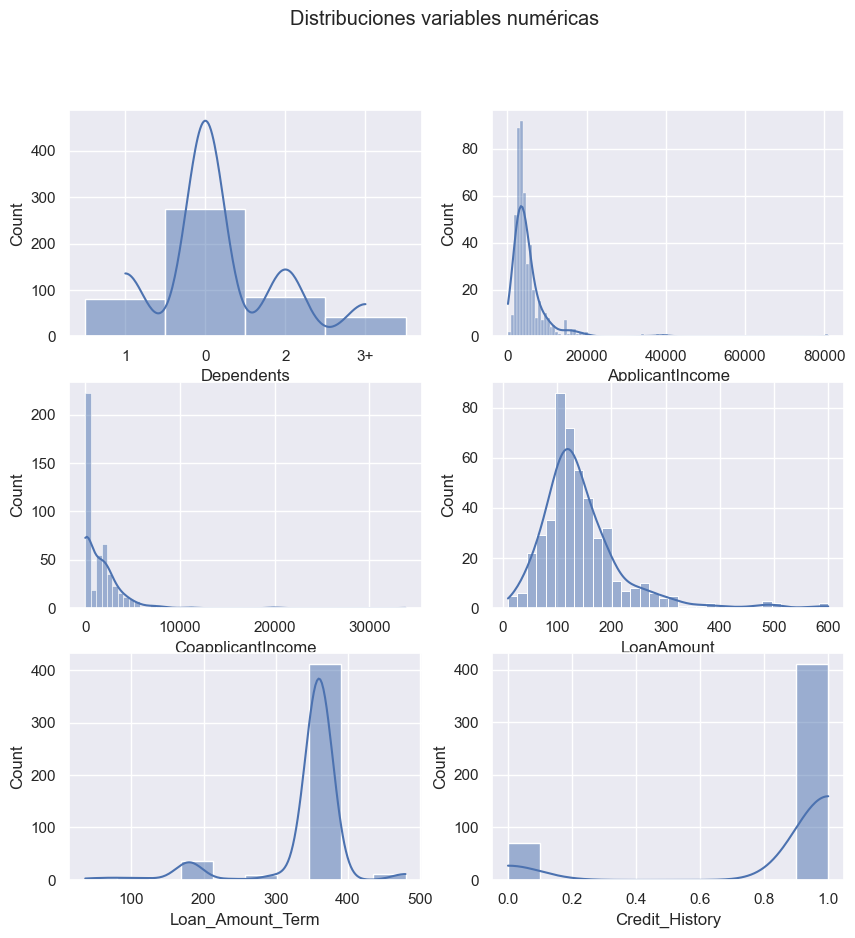

In [325]:
# Representación variables numéricas
num_columns = 2
num_rows = 3
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(num_rows,num_columns,figsize=(10,10))
axes = axes.flatten()

for i, column in enumerate(numericas.columns):
    sns.histplot(numericas[column],ax=axes[i],kde=True)
plt.suptitle("Distribuciones variables numéricas")

Podemos observar como la mayoria de préstamos se encuentran en un terminio de un año (360), por lo tanto, eliminaremos las variables que no se encuentren en este terminio.

Text(0.5, 0.98, 'Distribuciones variables categoricas')

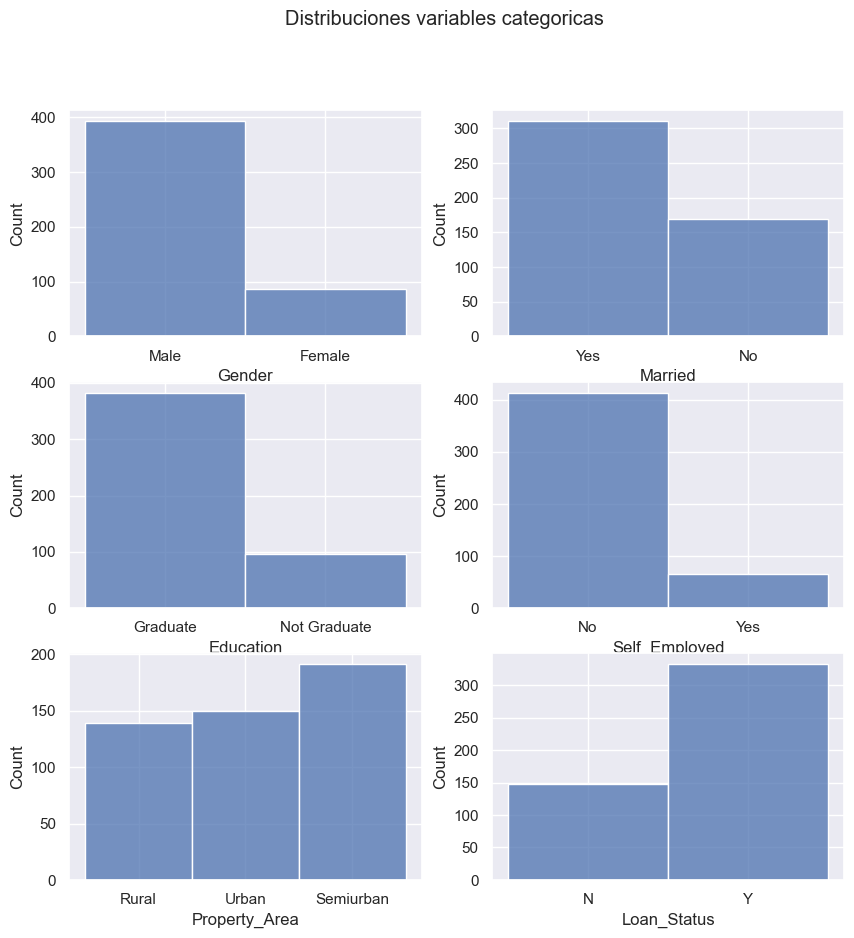

In [327]:
# Distribución variables categóricas
num_columns = 2
num_rows = 3
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(num_rows,num_columns,figsize=(10,10))
axes = axes.flatten()

for i, column in enumerate(categoricas.columns):
    sns.histplot(categoricas[column],ax=axes[i])
plt.suptitle("Distribuciones variables categoricas")


In [328]:
# Vamos a eliminar las variables que se encuentran con un Loan_Amount_Term distinto a 360.
data = data[data["Loan_Amount_Term"] == 360]

Puesto que todos los prestamos coinciden en que son concedidos por un año, vamos a eliminar la variable Loan_Amount_Term

In [330]:
data.drop(["Loan_Amount_Term"],axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,1.0,Urban,Y


#### Transformación de variables categoricas

Debemos modificar las variables categóricas como numéricas. Puesto que la mayoría de variables son binarias, utilizaremos la fórmula map. En la vairbale Property_Area, definiremos si es urbana o no, dandole a la SemiUrbana condicion de Urbana.

In [333]:
data["Dependents"].value_counts()

Dependents
0     243
2      72
1      64
3+     32
Name: count, dtype: int64

In [334]:
data["Gender"] = data["Gender"].map({"Male":1,"Female":0})
data["Married"] = data["Married"].map({"Yes":1,"No":0})
data["Education"] = data["Education"].map({"Graduate":1,"Not Graduate":0})
data["Self_Employed"] = data["Self_Employed"].map({"Yes":1,"No":0})
data["Property_Area"] = data["Property_Area"].map({"Urban":1,"Semiurban":1,"Rural":0})
data["Loan_Status"] = data["Loan_Status"].map({"Y":1,"N":0})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,1.0,1,1


Ahora faltara transformar la variable dependents, pues existe una de las variabels que es +3, donde lo consideraremos como 4.

In [336]:
data["Dependents"] = data["Dependents"].map({"0":0,"1":1,"2":2,"3+":4})
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,1.0,1,1


Dibujamos las correlaciones de las variables.

<Axes: >

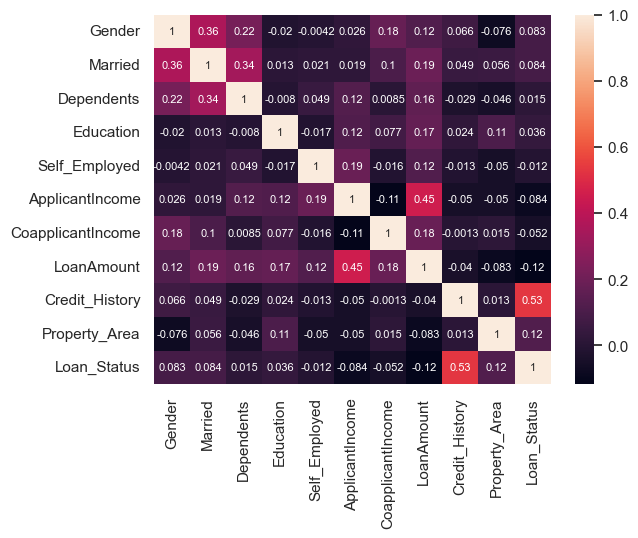

In [357]:
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 8})

Las conclusiones que extraemos son las siguientes. En primer lugar, la correlación del 50% entre el Loan_Status y el Credit_History. Podemos obvservar que aquellos que tienen un Historial de crédito positivo tienen un alto procentaje de concederse el préstamo. Por oto lado, la correlación existente entre el ApplicantIncome y el LoanAmount. 

Además, podemos observar una correlación negativa entre el Loan_Status y el Self_Employed.

#### Entrenamiento del modelo

Debemos separar primero entre variables X y variable y.

In [365]:
X = data.drop(["Loan_Status"],axis=1)
y = data["Loan_Status"]

In [373]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123456789)

In [379]:
modelo = svm.SVC(kernel="linear")

In [381]:
modelo.fit(X_train,y_train)

SVC(kernel='linear')

#### Evaluación del modelo

In [388]:
X_test_prediccion = modelo.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediccion,y_test)
test_data_accuracy

0.7951807228915663

Nuestro modelo predice en un 79,51% correctamente si se debe conceder o no un préstamo.

#### Simulador de predicción 

Vamos a simular la concesión de un prestamo o no con los siguientes datos:

* Gender = Male
* Married = Yes
* Dependents = 2
* Education = Graduate
* Self_Employed = Yes
* ApplicantIncome = 3000
* CoApplicantIncome = 2000
* LoanAmount = 200
* Credit_History = 1
* Property_Area = Urban

In [408]:
input_datos = (1,1,2,1,1,3000,2000,200,1,1)

# Camviamos los datos de input a un numpy array
input_datos_as_numpy_array = np.asarray(input_datos)

# Debemos modificar la np array
input_datos_modificados = input_datos_as_numpy_array.reshape(1,-1)

prediccion = modelo.predict(input_datos_modificados)
prediccion

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

El modelo nos dice que se debería conceder el préstamo.